<a href="https://colab.research.google.com/github/santiagofigueroaluchetti/APRENDIZAJE_AUTOMATICO_23_24/blob/main/PRACTICA_TERMINADA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Practica 3 Recuperacion Extraordinaria**

# *Santiago Figueroa*

# *Diego Hermana*

#*Daniel Vidal*

#**1. Introducción**

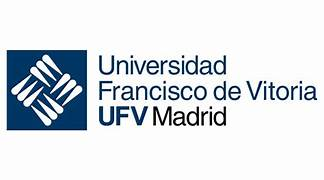

---


*   **Asignatura:** Aprendizaje Automático





---



**Definición del objetivo**

El objetivo de la presente práctica es desarrollar, configurar y entrenar un modelo de Redes Neuronales Convolucionales (CNN) capaz de reconocer y clasificar imágenes en 100 categorías.


La tarea principal consiste en la creación de un modelo de Red de Neuronas Convolucionales que pueda reconocer y clasificar imágenes en 100 categorías. Para ello, se utilizará el conjunto de datos CIFAR-100, el cual consta de 100 clases, cada una con 600 imágenes. Estas imágenes se dividen en 500 imágenes de entrenamiento y 100 imágenes de prueba por clase. Además, las clases se agrupan en 20 superclases y cada imagen está etiquetada tanto con la clase "fina" como con la clase "gruesa".








---




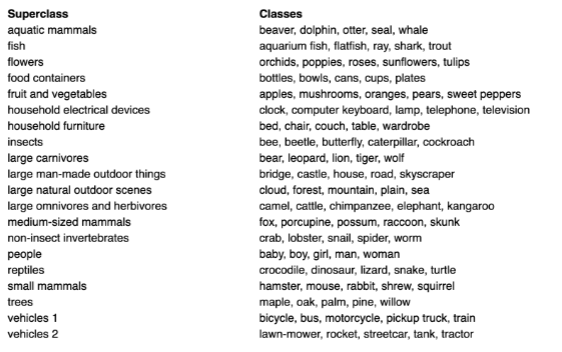







---




##**Estructura de la Red Neuronal Convolucional**

La estructura de una Red Neuronal Convolucional (CNN) se compone de múltiples capas convolucionales, capas de pooling y capas completamente conectadas. En el caso de la clasificación de imágenes, las capas convolucionales desempeñan un papel fundamental en la extracción de características relevantes de las imágenes. Estas capas aplican filtros a las imágenes de entrenamiento con diferentes resoluciones, y la salida resultante se utiliza como entrada para la siguiente capa. A diferencia de una red neuronal tradicional, una CNN comparte pesos y valores de sesgo entre todas las neuronas ocultas, lo que significa que todas ellas detectan las mismas características en diferentes regiones de la imagen.


La estructura de la red neuronal convolucional puede variar en función del problema y los datos utilizados. Es importante tomar decisiones sobre la arquitectura de la red, como el número de capas convolucionales, el tamaño de los filtros, la función de activación, entre otros. Estas decisiones pueden tener un impacto significativo en el rendimiento y la precisión del modelo.

##**Optimización de hiperparámetros**

Con el fin de lograr la mayor precisión en los datos de prueba, es necesario optimizar los hiperparámetros de la red neuronal convolucional. Los hiperparámetros son valores que se establecen antes del entrenamiento del modelo y que afectan su rendimiento. Algunos ejemplos de hiperparámetros son el número de capas convolucionales, el tamaño de los filtros, la tasa de aprendizaje y el tamaño del lote de entrenamiento.


##**Salida generada por el método model.summary()**

El método model.summary() proporciona una descripción detallada de la estructura y los parámetros del modelo final. Esta salida muestra la arquitectura de la red neuronal convolucional, incluyendo el número de capas, el tamaño de los filtros, el número de parámetros entrenables y no entrenables, entre otros detalles.


La salida generada por model.summary() resulta útil para comprender la estructura del modelo y verificar si se ha configurado correctamente. También puede ayudar a identificar posibles problemas, como capas con un número excesivo de parámetros o capas que no están conectadas correctamente.


Es importante revisar detenidamente la salida generada por model.summary() para asegurarse de que el modelo final se ha configurado correctamente y está listo para su entrenamiento y evaluación.

# **2. Importación de librerias necesarias y montar el conjunto de datos CIFAR-100**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

Cargar el conjunto de datos CIFAR-100

In [ ]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

169001437/169001437 [==============================] - 96s 1us/step


Normalizar los valores de píxeles entre 0 y 1


In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

Convertir las etiquetas a codificación one-hot categórica


In [ ]:
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

# **3. Seleccion de medida de exito**

Para seleccionar el mejor modelo e ir guiando la mejora y el aprendizaje del modelo vamos a utilizar como métrica de exito la **precisión**

#**4. Exploración de los datos**

####**1. Visualización de las imágenes**


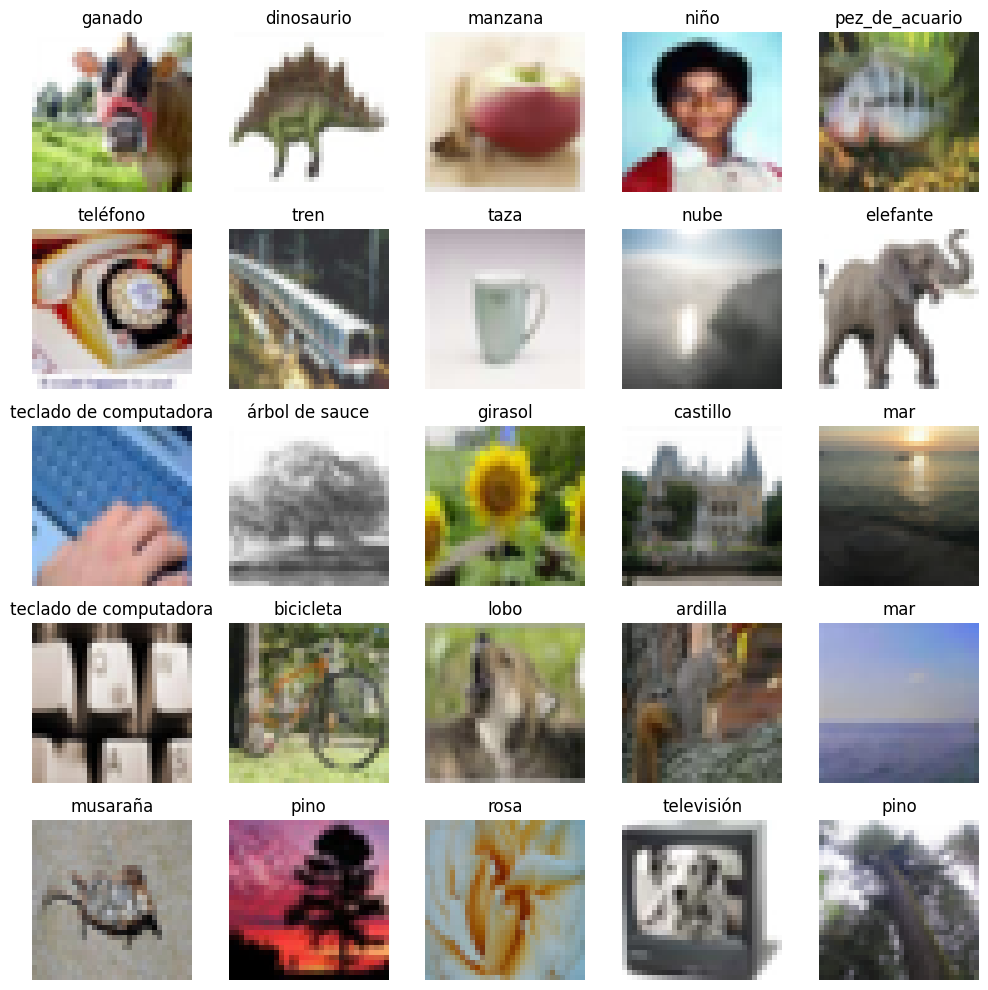

In [ ]:
import matplotlib.pyplot as plt


# Definir los nombres de las clases en CIFAR-100
class_names = {
    0: "manzana", 1: "pez_de_acuario", 2: "bebé", 3: "oso", 4: "castor", 5: "cama",
    6: "abeja", 7: "escarabajo", 8: "bicicleta", 9: "botella", 10: "tazón", 11: "niño",
    12: "puente", 13: "autobús", 14: "mariposa", 15: "camello", 16: "lata", 17: "castillo",
    18: "oruga", 19: "ganado", 20: "silla", 21: "chimpancé", 22: "reloj",
    23: "nube", 24: "cucaracha", 25: "sofá", 26: "cangrejo", 27: "cocodrilo",
    28: "taza", 29: "dinosaurio", 30: "delfín", 31: "elefante", 32: "lenguado",
    33: "bosque", 34: "zorro", 35: "niña", 36: "hámster", 37: "casa",
    38: "canguro", 39: "teclado de computadora", 40: "lámpara", 41: "cortacésped",
    42: "leopardo", 43: "león", 44: "lagarto", 45: "langosta", 46: "hombre",
    47: "arce", 48: "motocicleta", 49: "montaña", 50: "ratón",
    51: "seta", 52: "roble", 53: "naranja", 54: "orquídea", 55: "nutria",
    56: "palmera", 57: "pera", 58: "camioneta", 59: "pino",
    60: "llanura", 61: "platos", 62: "amapola", 63: "puercoespín", 64: "zarigüeya",
    65: "conejo", 66: "mapache", 67: "raya", 68: "carretera", 69: "cohete",
    70: "rosa", 71: "mar", 72: "foca", 73: "tiburón", 74: "musaraña",
    75: "mofeta", 76: "rascacielos", 77: "caracol", 78: "serpiente", 79: "araña",
    80: "ardilla", 81: "tranvía", 82: "girasol", 83: "pimiento",
    84: "mesa", 85: "tanque", 86: "teléfono", 87: "televisión", 88: "tigre",
    89: "tractor", 90: "tren", 91: "trucha", 92: "tulipán", 93: "tortuga",
    94: "armario", 95: "ballena", 96: "árbol de sauce", 97: "lobo",
    98: "mujer", 99: "gusano"


}
# Función para visualizar un conjunto de imágenes junto con sus etiquetas
def plot_images(images, labels, nrows, ncols, classes):
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols*2, nrows*2))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        # Para etiquetas codificadas en one-hot, usamos np.argmax para obtener el índice de la clase
        label_index = np.argmax(labels[i])
        ax.set_title(classes[label_index])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Asegúrate de tener train_images y train_labels preparados según las instrucciones previas
# Visualizar las primeras 25 imágenes del conjunto de entrenamiento
plot_images(train_images, train_labels, 5, 5, class_names)


#####**Salida de la visualización de imágenes con etiquetas predichas**

>La cuadrícula anterior muestra un conjunto de imágenes del conjunto de datos CIFAR-100. Cada imagen está acompañada por un título que indica la clase predicha por el modelo de red neuronal. Las clases están basadas en el conjunto de 100 categorías posibles que incluyen animales, vehículos, y objetos cotidianos entre otros. La visualización es útil para verificar la precisión de las predicciones del modelo y obtener una comprensión intuitiva de cómo está realizando las clasificaciones. Es evidente que algunas imágenes son correctamente clasificadas, como por ejemplo televisión o bicicleta, mientras que otras podrían ser más desafiantes debido a la similitud entre categorías o a la baja resolución de las imágenes.


####**2. Distribución de las clases**


**Conclusión sobre la distribución de clases en CIFAR-100**

> Al observar la distribución de clases en los conjuntos de datos CIFAR-100, es evidente que hay un equilibrio perfecto: cada clase está representada por 500 imágenes en el conjunto de entrenamiento y 100 imágenes en el conjunto de prueba. Esta uniformidad en la distribución es esencial para el entrenamiento de modelos de aprendizaje automático ya que asegura que el modelo no se incline a favor o en contra de ninguna clase debido a la frecuencia desigual en el entrenamiento o la validación.

> Este balance en la distribución proporciona un terreno de prueba equitativo y permite que cualquier medida de rendimiento, como la precisión del modelo, refleje con precisión la capacidad del modelo para generalizar a través de todas las clases. Por lo tanto, se puede esperar que la evaluación del modelo sea justa y que cualquier métrica de rendimiento sea una representación fiable de la capacidad general del modelo.


In [ ]:
import pandas as pd


relacion_clases_superclases = {
"castor": "mamíferos acuáticos",
"delfín": "mamíferos acuáticos",
"nutria": "mamíferos acuáticos",
"foca": "mamíferos acuáticos",
"ballena": "mamíferos acuáticos",
"pez_de_acuario": "peces",
"lenguado": "peces",
"raya": "peces",
"tiburón": "peces",
"trucha": "peces",
"orquídea": "flores",
"amapola": "flores",
"rosa": "flores",
"girasol": "flores",
"tulipán": "flores",
"botella": "recipientes de comida",
"tazón": "recipientes de comida",
"lata": "recipientes de comida",
"taza": "recipientes de comida",
"platos": "recipientes de comida",
"manzana": "frutas y verduras",
"seta": "frutas y verduras",
"naranja": "frutas y verduras",
"pera": "frutas y verduras",
"pimiento": "frutas y verduras",
"reloj": "dispositivos eléctricos para el hogar",
"teclado de computadora": "dispositivos eléctricos para el hogar",
"lámpara": "dispositivos eléctricos para el hogar",
"teléfono": "dispositivos eléctricos para el hogar",
"televisión": "dispositivos eléctricos para el hogar",
"cama": "muebles para el hogar",
"silla": "muebles para el hogar",
"sofá": "muebles para el hogar",
"mesa": "muebles para el hogar",
"armario": "muebles para el hogar",
"abeja": "insectos",
"escarabajo": "insectos",
"mariposa": "insectos",
"oruga": "insectos",
"cucaracha": "insectos",
"oso": "grandes carnívoros",
"leopardo": "grandes carnívoros",
"león": "grandes carnívoros",
"tigre": "grandes carnívoros",
"lobo": "grandes carnívoros",
"puente": "grandes estructuras artificiales al aire libre",
"castillo": "grandes estructuras artificiales al aire libre",
"casa": "grandes estructuras artificiales al aire libre",
"carretera": "grandes estructuras artificiales al aire libre",
"rascacielos": "grandes estructuras artificiales al aire libre",
"nube": "grandes escenas naturales al aire libre",
"bosque": "grandes escenas naturales al aire libre",
"montaña": "grandes escenas naturales al aire libre",
"llanura": "grandes escenas naturales al aire libre",
"mar": "grandes escenas naturales al aire libre",
"camello": "grandes omnívoros y herbívoros",
"ganado": "grandes omnívoros y herbívoros",
"chimpancé": "grandes omnívoros y herbívoros",
"elefante": "grandes omnívoros y herbívoros",
"canguro": "grandes omnívoros y herbívoros",
"zorro": "mamíferos de tamaño mediano",
"puercoespín": "mamíferos de tamaño mediano",
"zarigüeya": "mamíferos de tamaño mediano",
"mapache": "mamíferos de tamaño mediano",
"mofeta": "mamíferos de tamaño mediano",
"cangrejo": "invertebrados no insectos",
"langosta": "invertebrados no insectos",
"caracol": "invertebrados no insectos",
"araña": "invertebrados no insectos",
"gusano": "invertebrados no insectos",
"bebé": "personas",
"niño": "personas",
"niña": "personas",
"hombre": "personas",
"mujer": "personas",
"cocodrilo": "reptiles",
"dinosaurio": "reptiles",
"lagarto": "reptiles",
"serpiente":"reptiles",
 "tortuga": "reptiles",
"hámster": "pequeños mamíferos",
"ratón": "pequeños mamíferos",
"conejo": "pequeños mamíferos",
"musaraña": "pequeños mamíferos",
"ardilla": "pequeños mamíferos",
"arce": "árboles",
"roble": "árboles",
"palmera": "árboles",
"pino": "árboles",
"árbol de sauce": "árboles",
"bicicleta": "vehículos 1",
"autobús": "vehículos 1",
"motocicleta": "vehículos 1",
"camioneta": "vehículos 1",
"tren": "vehículos 1",
"cortacésped": "vehículos 2",
"cohete": "vehículos 2",
"tranvía": "vehículos 2",
"tanque": "vehículos 2",
"tractor": "vehículos 2"
}


# Primero, necesitamos revertir las etiquetas one-hot a sus etiquetas originales para facilitar el mapeo a superclases.
train_labels_idx = np.argmax(train_labels, axis=1)
test_labels_idx = np.argmax(test_labels, axis=1)

def calcular_frecuencias_superclases(labels_idx, relacion_clases_superclases):
    # Inicializamos un diccionario para contar las frecuencias de las superclases
    frecuencias_superclases = {superclase: 0 for superclase in set(relacion_clases_superclases.values())}

    for idx in labels_idx:
        # Obtenemos el nombre de la clase correspondiente al índice
        nombre_clase = class_names[idx]
        # Obtenemos la superclase correspondiente al nombre de la clase
        superclase = relacion_clases_superclases[nombre_clase]
        # Incrementamos el contador de la superclase
        frecuencias_superclases[superclase] += 1

    return frecuencias_superclases

# Calculamos las frecuencias de las superclases para los conjuntos de entrenamiento y prueba
frecuencias_superclases_entrenamiento = calcular_frecuencias_superclases(train_labels_idx, relacion_clases_superclases)
frecuencias_superclases_prueba = calcular_frecuencias_superclases(test_labels_idx, relacion_clases_superclases)

# Convertimos las frecuencias a un DataFrame para visualizarlas
frecuencias_superclases_df = pd.DataFrame({
    'Superclase': frecuencias_superclases_entrenamiento.keys(),
    'Frecuencia_Entrenamiento': frecuencias_superclases_entrenamiento.values(),
    'Frecuencia_Prueba': [frecuencias_superclases_prueba[superclase] for superclase in frecuencias_superclases_entrenamiento.keys()]
})

# Ordenamos el DataFrame por Superclase para mejorar la presentación
frecuencias_superclases_df.sort_values(by='Superclase', inplace=True)

# Mostramos la tabla de frecuencias de superclases
frecuencias_superclases_df.reset_index(drop=True, inplace=True)
frecuencias_superclases_df

,Superclase,Frecuencia_Entrenamiento,Frecuencia_Prueba
0,dispositivos eléctricos para el hogar,2500,500
1,flores,2500,500
2,frutas y verduras,2500,500
3,grandes carnívoros,2500,500
4,grandes escenas naturales al aire libre,2500,500
5,grandes estructuras artificiales al aire libre,2500,500
6,grandes omnívoros y herbívoros,2500,500
7,insectos,2500,500
8,invertebrados no insectos,2500,500
9,mamíferos acuáticos,2500,500


**Conclusión sobre la Distribución de Superclases en CIFAR-100**




El análisis de la distribución de superclases en CIFAR-100 revela que el conjunto de datos está equilibrado uniformemente a nivel de superclases. Cada una de las superclases se representa con 2500 imágenes en el conjunto de entrenamiento y 500 imágenes en el conjunto de prueba. Este equilibrio asegura que ningún grupo de clases relacionadas influya desproporcionadamente en el aprendizaje o en la validación del modelo.

El balance a nivel de superclase es beneficioso para la creación de modelos de clasificación robustos y menos sesgados, ya que cada superclase, que agrupa varias clases relacionadas, recibe la misma representación en el proceso de entrenamiento y evaluación. Esto indica que cualquier modelo entrenado en este conjunto de datos tendrá la oportunidad de aprender características discriminativas no solo a nivel de clase fina sino también a nivel de superclases más generales.

En conclusión, la estructura de CIFAR-100 es ideal para investigar y desarrollar modelos de clasificación de imágenes que requieren reconocer y diferenciar entre una amplia gama de categorías visuales tanto específicas como generales.

# **5. Modelos**

##Modelo de referencia

La arquitectura del modelo base es el siguiente:

* **Entrada:** La red toma imágenes de tamaño (32, 32, 3), es decir, imágenes de 32x32 píxeles con 3 canales (probablemente RGB).

1. **Primera capa convolucional:**

- Conv2D: Una capa convolucional con 32 filtros de tamaño 3x3 y función de activación ReLU.
- BatchNormalization: Normalización por lotes para estabilizar y acelerar el aprendizaje.
- MaxPooling2D: Reducción de dimensionalidad con un filtro de 2x2.
- Dropout: Regularización con una tasa de abandono del 25% para evitar sobreajuste.
2. **Segunda capa convolucional:**

- Conv2D: Una capa convolucional con 64 filtros de tamaño 3x3 y función de activación ReLU.
- BatchNormalization: Normalización por lotes.
- MaxPooling2D: Reducción de dimensionalidad con un filtro de 2x2.
- Dropout: Regularización con una tasa de abandono del 25%.

3. **Capa de aplanamiento:**

*   Flatten: Aplanamiento de los datos a una dimensión antes de pasarlos a las capas densas.

5. **Capa densa:**

* Dense: Una capa completamente conectada con 100 neuronas y función de activación softmax para clasificación.

**Compilación del modelo:**

* Optimizador: Adam.
* Función de pérdida: Categorical Crossentropy.
* Métrica: Precisión (accuracy).




In [ ]:
model001 = models.Sequential()
#Primera Capa de Red Convolucional
model001.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model001.add(layers.BatchNormalization())
model001.add(layers.MaxPooling2D((2, 2)))
model001.add(layers.Dropout(0.25))

#Segunda Capa de Red Convolucional
model001.add(layers.Conv2D(64, (3, 3), activation='relu'))
model001.add(layers.BatchNormalization())
model001.add(layers.MaxPooling2D((2, 2)))
model001.add(layers.Dropout(0.25))

# Añadir capa Flatten antes de la capa Dense
model001.add(layers.Flatten())
model001.add(layers.Dense(100, activation='softmax'))


model001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model001.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 13, 13, 64)        2

In [ ]:
model001.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 5s 10ms/step - loss: 4.1648 - accuracy: 0.1368 - val_loss: 3.9493 - val_accuracy: 0.1049
Epoch 2/32
313/313 [==============================] - 3s 9ms/step - loss: 3.2732 - accuracy: 0.2430 - val_loss: 3.1903 - val_accuracy: 0.2409
Epoch 3/32
313/313 [==============================] - 3s 8ms/step - loss: 2.8723 - accuracy: 0.3088 - val_loss: 3.6254 - val_accuracy: 0.2124
Epoch 4/32
313/313 [==============================] - 3s 9ms/step - loss: 2.6241 - accuracy: 0.3513 - val_loss: 2.7687 - val_accuracy: 0.3318
Epoch 5/32
313/313 [==============================] - 3s 9ms/step - loss: 2.4473 - accuracy: 0.3851 - val_loss: 3.1658 - val_accuracy: 0.2789
Epoch 6/32
313/313 [==============================] - 3s 9ms/step - loss: 2.3082 - accuracy: 0.4120 - val_loss: 2.7306 - val_accuracy: 0.3457
Epoch 7/32
313/313 [==============================] - 3s 9ms/step - loss: 2.1862 - accuracy: 0.4405 - val_loss: 2.5709 - val_accuracy: 0.3668
Epoch


En la época 32, el modelo tiene una pérdida de entrenamiento de 1.2814, lo que indica el error en el conjunto de entrenamiento; una precisión de entrenamiento de 63.52%, lo que significa que el modelo acertó el 63.52% de las veces en el conjunto de entrenamiento; una pérdida de validación de 2.6193, que muestra el error en el conjunto de validación; y una precisión de validación de 40.49%, lo que significa que el modelo acertó el 40.49% de las veces en el conjunto de validación.

##Modelo 1: Aumento en 1 capa respecto el modelo 0 (3 capas convolucionales)

Respecto al modelo base, se han añadido los siguientes elementos en la arquitectura del modelo 0:

1. Nueva capa convolucional:

* Se ha añadido una tercera capa convolucional con 128 filtros de tamaño 3x3 y activación ReLU.
* Esta capa también incluye BatchNormalization, MaxPooling2D y Dropout con una tasa de abandono del 25%.

In [ ]:
model1 = models.Sequential()

#Primera Capa de Red Convolucional
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.25))

#Segunda Capa de Red Convolucional
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.25))

#Tercera Capa de Red Convolucional
model1.add(layers.Conv2D(128, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(100, activation='softmax'))


model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_2 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_3 (Bat  (None, 13, 13, 64)       

In [ ]:
model1.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 12s 14ms/step - loss: 4.3653 - accuracy: 0.0659 - val_loss: 4.7691 - val_accuracy: 0.0280
Epoch 2/32
313/313 [==============================] - 3s 10ms/step - loss: 3.7211 - accuracy: 0.1313 - val_loss: 3.8195 - val_accuracy: 0.1130
Epoch 3/32
313/313 [==============================] - 3s 10ms/step - loss: 3.4166 - accuracy: 0.1826 - val_loss: 3.1875 - val_accuracy: 0.2275
Epoch 4/32
313/313 [==============================] - 4s 11ms/step - loss: 3.2206 - accuracy: 0.2145 - val_loss: 3.1260 - val_accuracy: 0.2298
Epoch 5/32
313/313 [==============================] - 3s 10ms/step - loss: 3.0768 - accuracy: 0.2396 - val_loss: 2.9426 - val_accuracy: 0.2755
Epoch 6/32
313/313 [==============================] - 3s 10ms/step - loss: 2.9599 - accuracy: 0.2677 - val_loss: 2.9973 - val_accuracy: 0.2647
Epoch 7/32
313/313 [==============================] - 3s 10ms/step - loss: 2.8832 - accuracy: 0.2788 - val_loss: 3.1047 - val_accuracy: 0.245

En la época 32, el modelo tiene una pérdida de entrenamiento de 2.2534, lo que indica el error en el conjunto de entrenamiento; una precisión de entrenamiento de 40.45%, lo que significa que el modelo acertó el 40.45% de las veces en el conjunto de entrenamiento; una pérdida de validación de 2.2249, que muestra el error en el conjunto de validación; y una precisión de validación de 41.74%, lo que significa que el modelo acertó el 41.74% de las veces en el conjunto de validación.

Comparación con la anterior:

1. **Pérdida de entrenamiento (loss):**

* Anterior: 1.2814
* Actual: 2.2510



La pérdida de entrenamiento actual es mayor, lo que indica un mayor error en el conjunto de entrenamiento.


2. **Precisión de entrenamiento (accuracy):**

* Anterior: 63.52%
* Actual: 40.69%

La precisión de entrenamiento actual es menor, lo que significa que el modelo es menos preciso en el conjunto de entrenamiento en comparación con el anterior.


3. **Pérdida de validación (val_loss):**

* Anterior: 2.6193
* Actual: 2.1902


La pérdida de validación actual es menor, lo que indica un menor error en el conjunto de validación en comparación con el anterior.


4. **Precisión de validación (val_accuracy):**

* Anterior: 40.49%
* Actual: 42.93%


La precisión de validación actual es ligeramente mayor, lo que significa que el modelo es un poco más preciso en el conjunto de validación en comparación con el anterior.

**CONCLUSIÓN DEL INCREMENTO**



En resumen, aunque el modelo actual tiene una mayor pérdida y menor precisión en el conjunto de entrenamiento, muestra una mejora en la pérdida y precisión en el conjunto de validación, lo que podría indicar que generaliza mejor a datos no vistos.



---



##Modelo 1 sin dropout

Dropout es una técnica de regularización utilizada en redes neuronales para prevenir el sobreajuste. Durante el entrenamiento, aleatoriamente "desactiva" un porcentaje de neuronas en cada capa en cada paso, lo que obliga a la red a aprender características más robustas y generalizables.








En este modelo vampos a pobrar si mejora el rendimiento no usandolo  

Sabiendo que este es mejor vamos a probar como funcionaría este último modelo sin usar Dropout.

In [ ]:
model12 = models.Sequential()

model12.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model12.add(layers.BatchNormalization())
model12.add(layers.MaxPooling2D((2, 2)))


model12.add(layers.Conv2D(64, (3, 3), activation='relu'))
model12.add(layers.BatchNormalization())
model12.add(layers.MaxPooling2D((2, 2)))

model12.add(layers.Conv2D(128, (3, 3), activation='relu'))
model12.add(layers.BatchNormalization())
model12.add(layers.MaxPooling2D((2, 2)))

model12.add(layers.Flatten())
model12.add(layers.Dense(128, activation='relu'))
model12.add(layers.BatchNormalization())
model12.add(layers.Dense(100, activation='softmax'))


model12.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model12.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 6s 11ms/step - loss: 3.6048 - accuracy: 0.1710 - val_loss: 4.5708 - val_accuracy: 0.0619
Epoch 2/32
313/313 [==============================] - 2s 7ms/step - loss: 2.8141 - accuracy: 0.3047 - val_loss: 2.9067 - val_accuracy: 0.2817
Epoch 3/32
313/313 [==============================] - 2s 7ms/step - loss: 2.4275 - accuracy: 0.3820 - val_loss: 2.8060 - val_accuracy: 0.3167
Epoch 4/32
313/313 [==============================] - 2s 8ms/step - loss: 2.1623 - accuracy: 0.4398 - val_loss: 2.6274 - val_accuracy: 0.3529
Epoch 5/32
313/313 [==============================] - 3s 10ms/step - loss: 1.9586 - accuracy: 0.4846 - val_loss: 2.6934 - val_accuracy: 0.3447
Epoch 6/32
313/313 [==============================] - 2s 8ms/step - loss: 1.7754 - accuracy: 0.5260 - val_loss: 2.5365 - val_accuracy: 0.3796
Epoch 7/32
313/313 [==============================] - 2s 7ms/step - loss: 1.6220 - accuracy: 0.5628 - val_loss: 2.6092 - val_accuracy: 0.3735
Epoc

Comparando el último modelo con el nuevo modelo sin dropout, tenemos los siguiente comporativa:

1. **Pérdida de entrenamiento (loss):**

- Anterior: 2.2534
- Nuevo: 0.2196


El nuevo modelo tiene una pérdida de entrenamiento significativamente menor, lo que indica un error mucho menor en el conjunto de entrenamiento.

2. **Precisión de entrenamiento (accuracy):**

- Anterior: 40.45%
- Nuevo: 93.01%



El nuevo modelo tiene una precisión de entrenamiento mucho mayor, indicando que acierta en un 93.01% de las veces en el conjunto de entrenamiento.


3. **Pérdida de validación (val_loss):**

- Anterior: 2.2249
- Nuevo: 5.2182



El nuevo modelo tiene una pérdida de validación significativamente mayor, lo que indica un error mucho mayor en el conjunto de validación.


4. **Precisión de validación (val_accuracy):**

- Anterior: 41.74%
- Nuevo: 34.55%


El nuevo modelo tiene una precisión de validación menor, indicando que acierta menos veces en el conjunto de validación (34.55% en comparación con el 41.74%).

**Conclusión:**


El nuevo modelo sin dropout parece estar sobreajustando (overfitting) los datos de entrenamiento, ya que tiene una pérdida de entrenamiento muy baja y una alta precisión de entrenamiento, pero su desempeño en el conjunto de validación es peor en términos de pérdida y precisión.


Por lo tanto, el modelo anterior (con dropout) es mejor para seguir trabajando, ya que tiene un mejor desempeño en el conjunto de validación, lo que indica una mejor capacidad de generalización a datos no vistos.



---



##Estudio de la alternativa de incluir regularizadores l1 y l2 al modelo con Dropout


Los regularizadores L1 y L2 son técnicas utilizadas para prevenir el sobreajuste.


 L1 (Lasso) agrega una penalización proporcional al valor absoluto de los coeficientes de los pesos, fomentando la creación de pesos escasos, mientras que L2 (Ridge) agrega una penalización proporcional al cuadrado de los coeficientes de los pesos, tendiendo a reducir todos los pesos pero sin forzarlos a ser exactamente cero.

**Intento 1 con regularizadores l1 y l2**

In [ ]:
from tensorflow.keras import models, layers, regularizers

model22 = models.Sequential()

# Primera Capa de Red Convolucional
# Se agrega un regularizador L2 con una penalización de 0.01
model22.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                         kernel_regularizer=regularizers.l2(0.01)))
model22.add(layers.BatchNormalization())
model22.add(layers.MaxPooling2D((2, 2)))
model22.add(layers.Dropout(0.25))

# Segunda Capa de Red Convolucional
# Se agrega un regularizador L2 con una penalización de 0.01
model22.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model22.add(layers.BatchNormalization())
model22.add(layers.MaxPooling2D((2, 2)))
model22.add(layers.Dropout(0.25))

# Tercera Capa de Red Convolucional
# Se agrega un regularizador L2 con una penalización de 0.01
model22.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model22.add(layers.BatchNormalization())
model22.add(layers.MaxPooling2D((2, 2)))
model22.add(layers.Dropout(0.25))

model22.add(layers.Flatten())

# Capa Densa
# Se agrega un regularizador combinado L1 y L2 con una penalización de 0.01 para ambos
model22.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
model22.add(layers.BatchNormalization())
model22.add(layers.Dropout(0.5))

# Capa de Salida
# Se agrega un regularizador combinado L1 y L2 con una penalización de 0.01 para ambos
model22.add(layers.Dense(100, activation='softmax', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))

model22.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model22.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_14 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_15 (Ba  (None, 13, 13, 64)       

In [ ]:
model22.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 7s 14ms/step - loss: 13.9234 - accuracy: 0.0556 - val_loss: 5.6209 - val_accuracy: 0.0199
Epoch 2/32
313/313 [==============================] - 4s 12ms/step - loss: 5.1207 - accuracy: 0.0675 - val_loss: 5.1631 - val_accuracy: 0.0432
Epoch 3/32
313/313 [==============================] - 4s 13ms/step - loss: 4.9559 - accuracy: 0.0745 - val_loss: 4.9572 - val_accuracy: 0.0847
Epoch 4/32
313/313 [==============================] - 4s 12ms/step - loss: 4.9344 - accuracy: 0.0807 - val_loss: 5.0601 - val_accuracy: 0.0725
Epoch 5/32
313/313 [==============================] - 4s 13ms/step - loss: 4.9412 - accuracy: 0.0862 - val_loss: 4.9362 - val_accuracy: 0.0872
Epoch 6/32
313/313 [==============================] - 4s 13ms/step - loss: 4.9390 - accuracy: 0.0925 - val_loss: 5.0684 - val_accuracy: 0.0861
Epoch 7/32
313/313 [==============================] - 3s 10ms/step - loss: 4.9477 - accuracy: 0.0942 - val_loss: 4.9630 - val_accuracy: 0.101

**Alternativa 2 de regularizadores**

In [ ]:
from tensorflow.keras import models, layers, regularizers

modelo23 = models.Sequential()

# Definición de regularizadores
regularizador_l2 = regularizers.l2(0.01)
regularizador_l1_l2 = regularizers.l1_l2(l1=0.01, l2=0.01)

# Primera Capa de Red Convolucional
# Se utiliza el regularizador L2 definido anteriormente
modelo23.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),
                           kernel_regularizer=regularizador_l2))
modelo23.add(layers.BatchNormalization())
modelo23.add(layers.MaxPooling2D((2, 2)))
modelo23.add(layers.Dropout(0.25))

# Segunda Capa de Red Convolucional
# Se utiliza el regularizador L2 definido anteriormente
modelo23.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizador_l2))
modelo23.add(layers.BatchNormalization())
modelo23.add(layers.MaxPooling2D((2, 2)))
modelo23.add(layers.Dropout(0.25))

# Tercera Capa de Red Convolucional
# Se utiliza el regularizador L2 definido anteriormente
modelo23.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizador_l2))
modelo23.add(layers.BatchNormalization())
modelo23.add(layers.MaxPooling2D((2, 2)))
modelo23.add(layers.Dropout(0.25))

modelo23.add(layers.Flatten())

# Capa Densa
# Se utiliza el regularizador combinado L1 y L2 definido anteriormente
modelo23.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizador_l1_l2))
modelo23.add(layers.BatchNormalization())
modelo23.add(layers.Dropout(0.5))

# Capa de Salida
# Se utiliza el regularizador combinado L1 y L2 definido anteriormente
modelo23.add(layers.Dense(100, activation='softmax', kernel_regularizer=regularizador_l1_l2))

modelo23.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo23.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 32)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_19 (Ba  (None, 13, 13, 64)       

In [ ]:
model22.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 4s 12ms/step - loss: 4.6998 - accuracy: 0.1768 - val_loss: 4.6787 - val_accuracy: 0.1780
Epoch 2/32
313/313 [==============================] - 3s 10ms/step - loss: 4.7025 - accuracy: 0.1756 - val_loss: 4.6144 - val_accuracy: 0.1996
Epoch 3/32
313/313 [==============================] - 5s 16ms/step - loss: 4.6871 - accuracy: 0.1808 - val_loss: 4.5342 - val_accuracy: 0.2127
Epoch 4/32
313/313 [==============================] - 4s 12ms/step - loss: 4.7013 - accuracy: 0.1810 - val_loss: 4.5425 - val_accuracy: 0.2248
Epoch 5/32
313/313 [==============================] - 3s 10ms/step - loss: 4.6861 - accuracy: 0.1803 - val_loss: 4.5352 - val_accuracy: 0.2335
Epoch 6/32
313/313 [==============================] - 4s 12ms/step - loss: 4.6978 - accuracy: 0.1786 - val_loss: 4.6531 - val_accuracy: 0.1980
Epoch 7/32
313/313 [==============================] - 3s 10ms/step - loss: 4.6871 - accuracy: 0.1820 - val_loss: 4.5558 - val_accuracy: 0.2244

###**Comparación de Modelos**

**Modelo Anterior (3 capas convolucionales con dropout, sin regularizadores)**
- Pérdida de entrenamiento: Menor.
- Precisión de entrenamiento: Mayor.
- Pérdida de validación: Menor.
- Precisión de validación: Mayor.


**Nuevo Modelo (con regularizadores L1 y L2)**
- Pérdida de entrenamiento: Mayor.
- Precisión de entrenamiento: Menor.
- Pérdida de validación: Mayor.
- Precisión de validación: Menor.


**Conclusión**

El modelo anterior, que tiene 3 capas convolucionales con dropout pero sin regularizadores, es claramente el mejor. Muestra una menor pérdida y una mayor precisión tanto en el conjunto de entrenamiento como en el de validación en comparación con los nuevos modelos con regularizadores L1 y L2.

Hemos visto que el modelo ha mejorado su metrica de precision con 3 capas con dropout, vamos a probar a entrenar un modelo ahora con 5 capas con dropout.

##Modelo de 5 Capas Convolucionales con Dropout (Dos capas más que el modelo que mejor está rindiendo)

Siguiendo con el modelo que mejor está rindiendo vamos a realizar un aumento siguiendo la misma estructura de en vez de 3 capas de 5 para estudiar si sigue mejorando la precisión

In [ ]:
# Construir el modelo
model = models.Sequential()

# Capa 1: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 2: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 3: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 4: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Capa 5: Conv2D + BatchNormalization + MaxPooling + Dropout
model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding='same'))
model.add(layers.Dropout(0.25))

# Aplanar y conectar a capas totalmente conectadas
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))  # Reducido a 256 unidades
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 30, 30, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 15, 15, 64)        2

In [ ]:
model.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 17s 22ms/step - loss: 4.4247 - accuracy: 0.0677 - val_loss: 5.3754 - val_accuracy: 0.0258
Epoch 2/32
313/313 [==============================] - 5s 15ms/step - loss: 3.6458 - accuracy: 0.1458 - val_loss: 3.6518 - val_accuracy: 0.1531
Epoch 3/32
313/313 [==============================] - 5s 15ms/step - loss: 3.2231 - accuracy: 0.2081 - val_loss: 3.1109 - val_accuracy: 0.2404
Epoch 4/32
313/313 [==============================] - 5s 16ms/step - loss: 2.9372 - accuracy: 0.2610 - val_loss: 2.9029 - val_accuracy: 0.2799
Epoch 5/32
313/313 [==============================] - 5s 15ms/step - loss: 2.7521 - accuracy: 0.3012 - val_loss: 2.6128 - val_accuracy: 0.3275
Epoch 6/32
313/313 [==============================] - 5s 16ms/step - loss: 2.5940 - accuracy: 0.3294 - val_loss: 3.3753 - val_accuracy: 0.2495
Epoch 7/32
313/313 [==============================] - 5s 16ms/step - loss: 2.4673 - accuracy: 0.3575 - val_loss: 2.6426 - val_accuracy: 0.332

Hemos decidido crear un modelo con 5 capas utilizando dropout.
**Podemos observar que ha sido nuestro modelo mas exitoso hasta el momento**, el que mayor precisión nos ha dado, con una precision de 0.50.

En contraste con el anterior modelo, este ha sido optimizado para lograr un rendimiento superior. Manteniendo la esencia de la anterior interación, hemos añadido otras 2 capas, además hemos fortalecido aún más la arquitectura con capas adicionales y ajustes precisos en los hiperparámetros. Esta versión ha superado las limitaciones de las iteraciones anteriores, ofreciendo una mayor precisión y estabilidad en el procesamiento de datos.

##Modelo de 7 Capas Convolucionales con Dropout (Dos capas más que el modelo que mejor está rindiendo)

In [ ]:
from tensorflow.keras import layers, models

# Definición del modelo con cuatro capas adicionales
modelo_4 = models.Sequential()

# Primera Capa de Red Convolucional
modelo_4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Segunda Capa de Red Convolucional
modelo_4.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Tercera Capa de Red Convolucional
modelo_4.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Cuarta Capa de Red Convolucional
modelo_4.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Quinta Capa de Red Convolucional
modelo_4.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Sexta Capa de Red Convolucional
modelo_4.add(layers.Conv2D(1024, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Séptima Capa de Red Convolucional
modelo_4.add(layers.Conv2D(2048, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

# Octava Capa de Red Convolucional
modelo_4.add(layers.Conv2D(4096, (3, 3), activation='relu', padding='same'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.MaxPooling2D((2, 2), padding='same'))
modelo_4.add(layers.Dropout(0.25))

modelo_4.add(layers.Flatten())
modelo_4.add(layers.Dense(128, activation='relu'))
modelo_4.add(layers.BatchNormalization())
modelo_4.add(layers.Dropout(0.5))
modelo_4.add(layers.Dense(100, activation='softmax'))

modelo_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

modelo_4.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_3 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 15, 15, 64)       

In [ ]:
modelo_4.fit(train_images, train_labels, epochs=32, batch_size=128, validation_split=0.2)

Epoch 1/32
313/313 [==============================] - 98s 244ms/step - loss: 4.4390 - accuracy: 0.0553 - val_loss: 4.8070 - val_accuracy: 0.0260
Epoch 2/32
313/313 [==============================] - 69s 219ms/step - loss: 3.8354 - accuracy: 0.1089 - val_loss: 4.1450 - val_accuracy: 0.0786
Epoch 3/32
313/313 [==============================] - 70s 224ms/step - loss: 3.5379 - accuracy: 0.1498 - val_loss: 3.7084 - val_accuracy: 0.1269
Epoch 4/32
313/313 [==============================] - 69s 219ms/step - loss: 3.3109 - accuracy: 0.1869 - val_loss: 3.5400 - val_accuracy: 0.1639
Epoch 5/32
313/313 [==============================] - 69s 219ms/step - loss: 3.1529 - accuracy: 0.2156 - val_loss: 3.1958 - val_accuracy: 0.2202
Epoch 6/32
313/313 [==============================] - 70s 224ms/step - loss: 3.0038 - accuracy: 0.2408 - val_loss: 3.1214 - val_accuracy: 0.2298
Epoch 7/32
313/313 [==============================] - 69s 220ms/step - loss: 2.8721 - accuracy: 0.2701 - val_loss: 2.9880 - val_ac

Hemos añadido al modelo anterior otras dos capas convolucionales, si bien representa un avance respecto los primeros modelos, aún no alcanza el nivel de rendimiento deseado, obtenido en el modelo con 5 capas. Esto se puede deber a problemas de sobreajuste, debido a la complejidad del modelo que dificulte su la capacidad de generalización.

# **6.Seleccion y entrenamiento con early stopping del modelo final**

Tras haber creado varios modelos probando distintas tecnicas de aprendizaje automático el modelo que mas valor ha dado a nuestra medida de éxito, es decir, , el modelo que ha proporcionado resultados más sólidos y consistentes con una precision mayor ha sido el modelo de 5 capas convolucionales con dropout.

Vamos a aplicarle early stopping:

El early stopping en TensorFlow es una técnica que detiene el entrenamiento de un modelo cuando su rendimiento en un conjunto de validación deja de mejorar, y el parámetro patience define el número de épocas adicionales que el entrenamiento continuará después de la última mejora antes de detenerse.

Al entrenarlo con EarlyStopping obtendremos unos resultados aun mejores que nos permitirá aplicar este modelo en diversas aplicaciones, estableciendo un nuevo estándar de excelencia en nuestro análisis de datos y procesamiento de imágenes.

In [ ]:
# Definir EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
history = model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels), callbacks=[early_stopping])

Epoch 1/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7220 - accuracy: 0.5251 - val_loss: 2.1944 - val_accuracy: 0.4530
Epoch 2/100
1563/1563 [==============================] - 15s 10ms/step - loss: 1.6895 - accuracy: 0.5344 - val_loss: 1.9158 - val_accuracy: 0.5044
Epoch 3/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.6431 - accuracy: 0.5469 - val_loss: 1.8208 - val_accuracy: 0.5237
Epoch 4/100
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6132 - accuracy: 0.5517 - val_loss: 1.9365 - val_accuracy: 0.5073
Epoch 5/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5907 - accuracy: 0.5548 - val_loss: 1.8544 - val_accuracy: 0.5184
Epoch 6/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5616 - accuracy: 0.5623 - val_loss: 1.7507 - val_accuracy: 0.5398
Epoch 7/100
1563/1563 [==============================] - 15s 9ms/step - loss: 1.5356 - accuracy: 0.5703 - val_loss: 1.9382

#**7. Evaluación en conjunto de testeo**

**Evaluamos nuestro mejor modelo (5 capas convolucionales con droput)**

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('La precisión del test es de',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 1.7076 - accuracy: 0.5556
La precisión del test es de 0.5555999875068665


Ahora vamos a probar con un ejemplo de las test images como nos reconoce.
Podemos selecciona rla imagen que queramos solo tendremos que modificar el numero de las imágenes de test. Si quisiesemos comprobar la imagen 5,
test_image[5]

Hemos creado una herramienta para que una vez nos muestre la imagen nos diga la clase y la superclase que pertenece a dicha imagen.

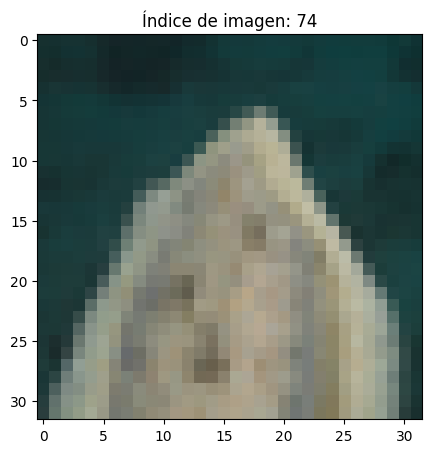

1/1 [==============================] - 0s 19ms/step
La clase de la imagen 74 es: oso
La superclase de la imagen 74 es: grandes carnívoros


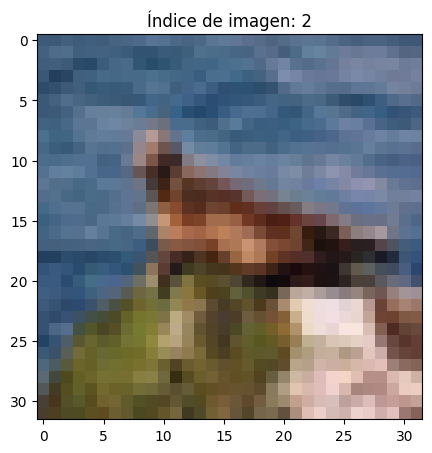

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 2 es: foca
La superclase de la imagen 2 es: mamíferos acuáticos


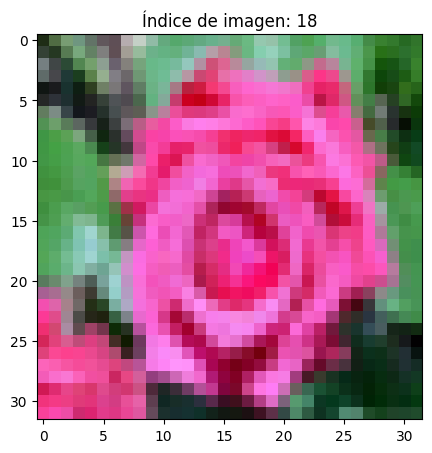

1/1 [==============================] - 0s 18ms/step
La clase de la imagen 18 es: rosa
La superclase de la imagen 18 es: flores


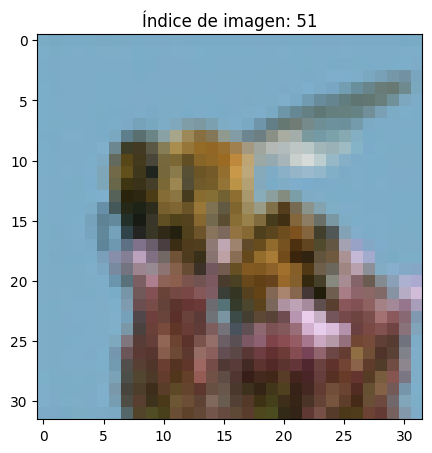

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 51 es: abeja
La superclase de la imagen 51 es: insectos


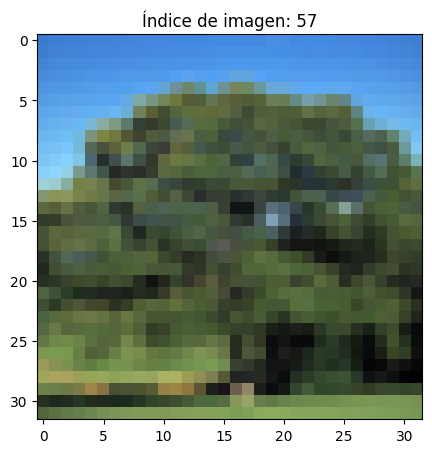

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 57 es: roble
La superclase de la imagen 57 es: árboles


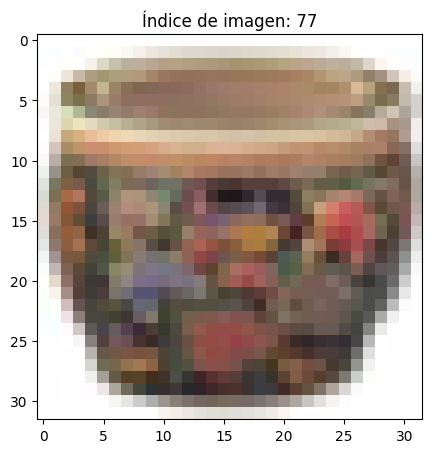

1/1 [==============================] - 0s 18ms/step
La clase de la imagen 77 es: lata
La superclase de la imagen 77 es: recipientes de comida


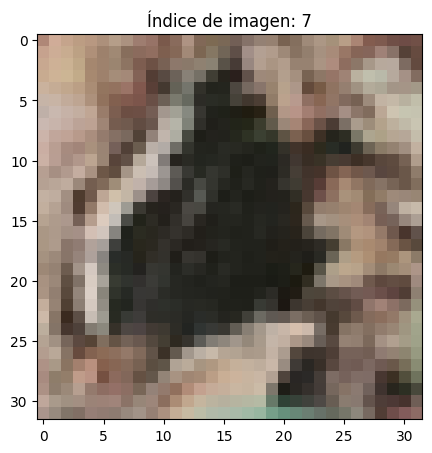

1/1 [==============================] - 0s 18ms/step
La clase de la imagen 7 es: musaraña
La superclase de la imagen 7 es: pequeños mamíferos


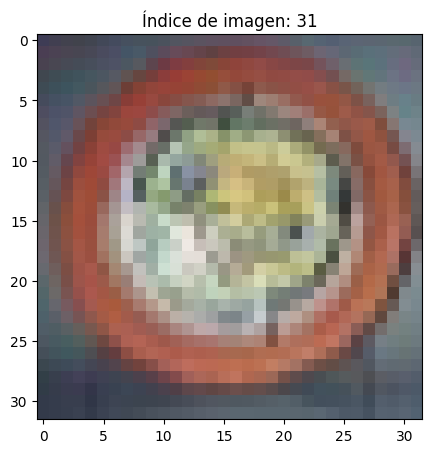

1/1 [==============================] - 0s 30ms/step
La clase de la imagen 31 es: tazón
La superclase de la imagen 31 es: recipientes de comida


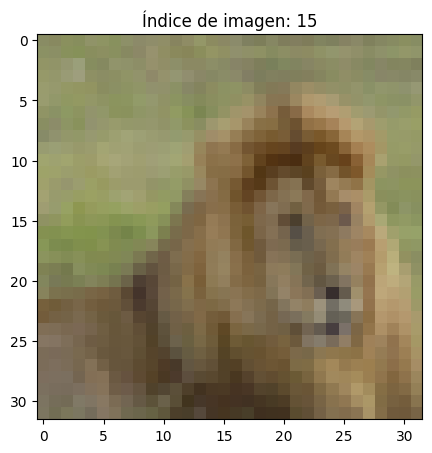

1/1 [==============================] - 0s 18ms/step
La clase de la imagen 15 es: león
La superclase de la imagen 15 es: grandes carnívoros


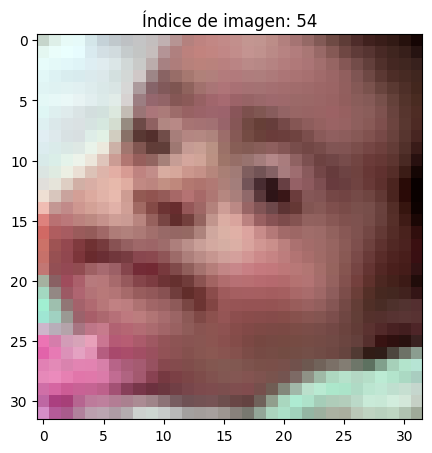

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 54 es: niña
La superclase de la imagen 54 es: personas


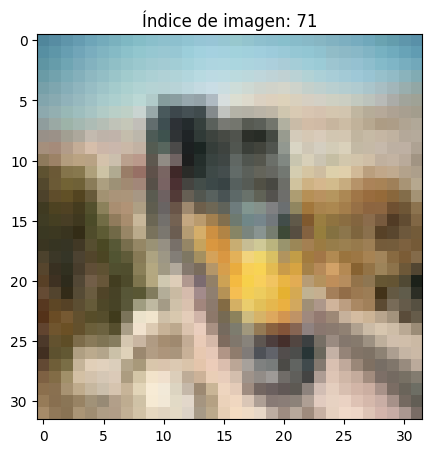

1/1 [==============================] - 0s 20ms/step
La clase de la imagen 71 es: abeja
La superclase de la imagen 71 es: insectos


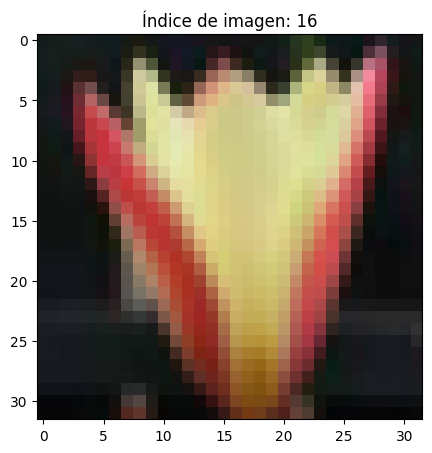

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 16 es: tulipán
La superclase de la imagen 16 es: flores


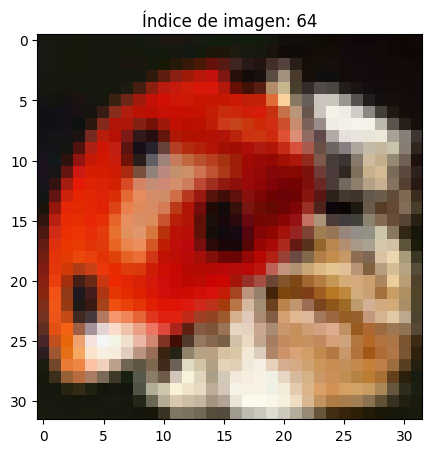

1/1 [==============================] - 0s 18ms/step
La clase de la imagen 64 es: langosta
La superclase de la imagen 64 es: invertebrados no insectos


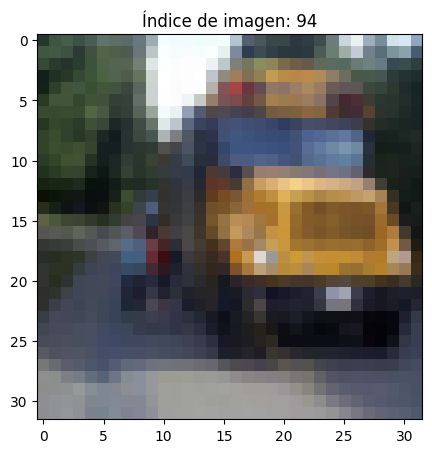

1/1 [==============================] - 0s 19ms/step
La clase de la imagen 94 es: autobús
La superclase de la imagen 94 es: vehículos 1


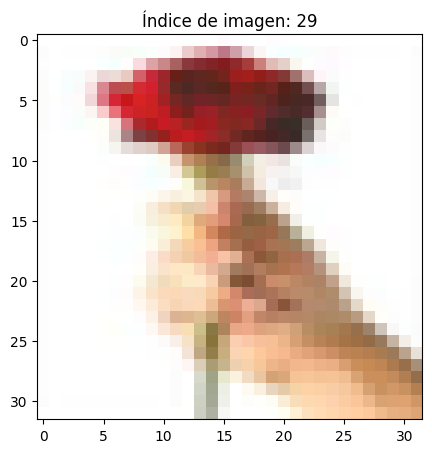

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 29 es: taza
La superclase de la imagen 29 es: recipientes de comida


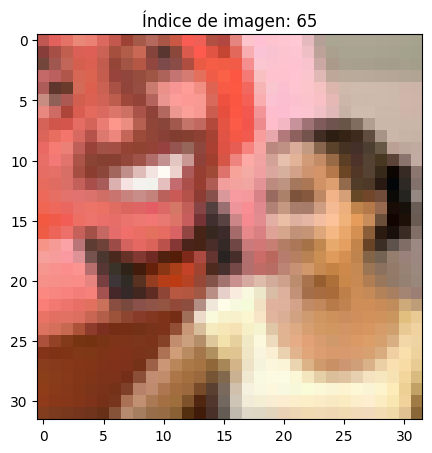

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 65 es: mujer
La superclase de la imagen 65 es: personas


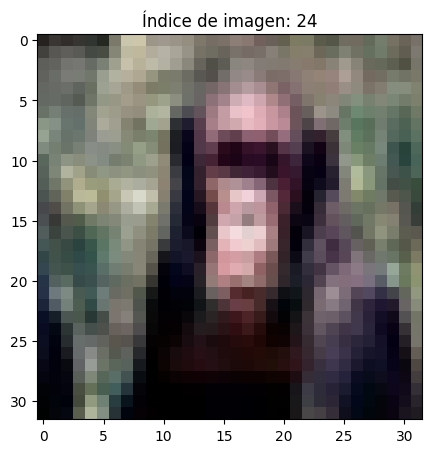

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 24 es: chimpancé
La superclase de la imagen 24 es: grandes omnívoros y herbívoros


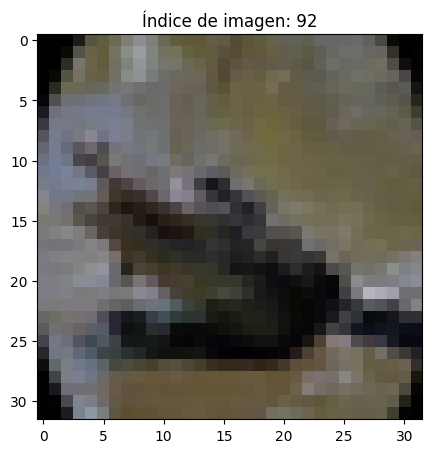

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 92 es: cocodrilo
La superclase de la imagen 92 es: reptiles


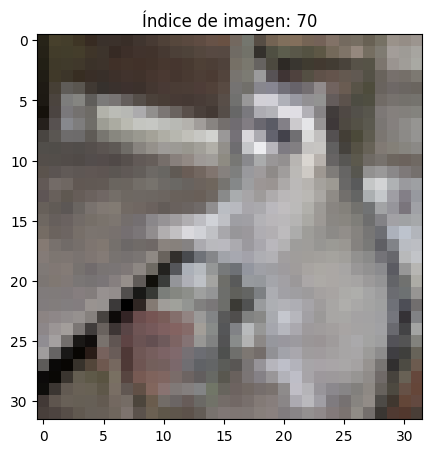

1/1 [==============================] - 0s 23ms/step
La clase de la imagen 70 es: bicicleta
La superclase de la imagen 70 es: vehículos 1


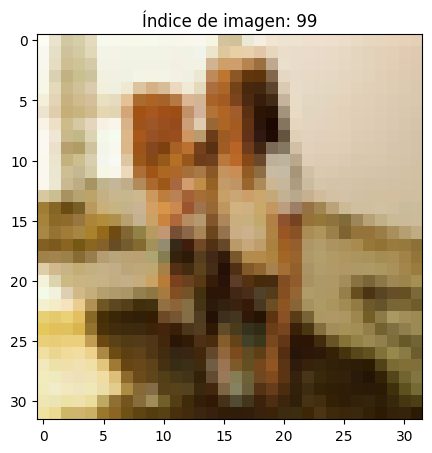

1/1 [==============================] - 0s 17ms/step
La clase de la imagen 99 es: leopardo
La superclase de la imagen 99 es: grandes carnívoros


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar 20 índices aleatorios de imágenes del 0 al 99
indices_aleatorios = np.random.choice(100, 20, replace=False)



for idx in indices_aleatorios:
    # Suponiendo que test_images[idx] es una imagen en formato de píxeles (array NumPy)
    image_to_visualize = test_images[idx]

    # Muestra la imagen
    plt.figure(figsize=(10, 5))
    plt.imshow(image_to_visualize)
    plt.title(f"Índice de imagen: {idx}")
    plt.show()







    # Preparar los datos para el modelo
    input_data = np.expand_dims(test_images[idx], axis=0)
    predictions = model.predict(input_data)
    etiqueta_predicha = np.argmax(predictions)

    # Definir un diccionario que mapea números a etiquetas (como ya tienes definido)
    etiquetas = {
         0: "manzana", 1: "pez_de_acuario", 2: "bebé", 3: "oso", 4: "castor", 5: "cama",
         6: "abeja", 7: "escarabajo", 8: "bicicleta", 9: "botella", 10: "tazón", 11: "niño",
        12: "puente", 13: "autobús", 14: "mariposa", 15: "camello", 16: "lata", 17: "castillo",
        18: "oruga", 19: "ganado", 20: "silla", 21: "chimpancé", 22: "reloj",
        23: "nube", 24: "cucaracha", 25: "sofá", 26: "cangrejo", 27: "cocodrilo",
        28: "taza", 29: "dinosaurio", 30: "delfín", 31: "elefante", 32: "lenguado",
        33: "bosque", 34: "zorro", 35: "niña", 36: "hámster", 37: "casa",
        38: "canguro", 39: "teclado de computadora", 40: "lámpara", 41: "cortacésped",
        42: "leopardo", 43: "león", 44: "lagarto", 45: "langosta", 46: "hombre",
        47: "arce", 48: "motocicleta", 49: "montaña", 50: "ratón",
        51: "seta", 52: "roble", 53: "naranja", 54: "orquídea", 55: "nutria",
        56: "palmera", 57: "pera", 58: "camioneta", 59: "pino",
        60: "llanura", 61: "platos", 62: "amapola", 63: "puercoespín", 64: "zarigüeya",
        65: "conejo", 66: "mapache", 67: "raya", 68: "carretera", 69: "cohete",
        70: "rosa", 71: "mar", 72: "foca", 73: "tiburón", 74: "musaraña",
        75: "mofeta", 76: "rascacielos", 77: "caracol", 78: "serpiente", 79: "araña",
        80: "ardilla", 81: "tranvía", 82: "girasol", 83: "pimiento",
        84: "mesa", 85: "tanque", 86: "teléfono", 87: "televisión", 88: "tigre",
        89: "tractor", 90: "tren", 91: "trucha", 92: "tulipán", 93: "tortuga",
        94: "armario", 95: "ballena", 96: "árbol de sauce", 97: "lobo",
        98: "mujer", 99: "gusano"
    }



    # Verificar si el número predicho está en el diccionario
    if etiqueta_predicha in etiquetas:
        # Obtener la etiqueta correspondiente al número
        etiqueta_predicha = etiquetas[etiqueta_predicha]
        print(f"La clase de la imagen {idx} es: {etiqueta_predicha}")
    else:
        print(f"Número no reconocido para la imagen {idx}")

    # Suponiendo que tienes un diccionario llamado relacion_clases_superclases
    # Verificar si la clase está en la relación y obtener la superclase
    if etiqueta_predicha in relacion_clases_superclases:
        superclase = relacion_clases_superclases[etiqueta_predicha]
        print(f"La superclase de la imagen {idx} es: {superclase}")
    else:
        print(f"No se encontró información para la clase de la imagen {idx}")



#**8. Conclusión**

Gráficas que nos muestran de forma mas intuitiva como ha ido el entrenamiento y de que forma ha ido variando la precisión y la pérdida.

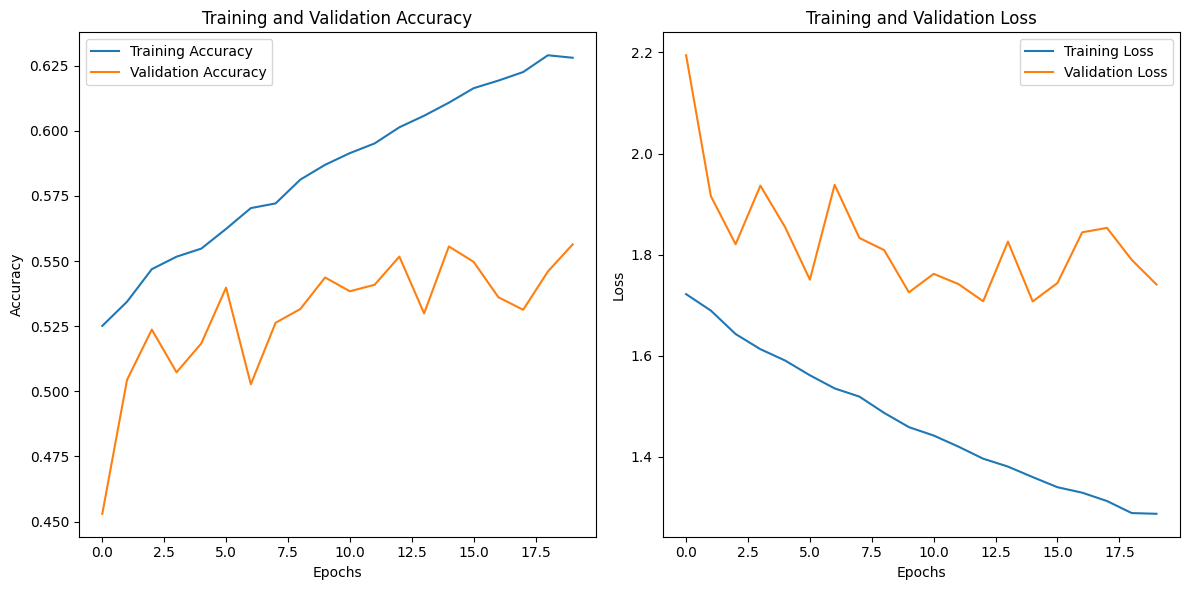

In [ ]:
# Gráfica de precisión (accuracy)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Gráfica de pérdida (loss)
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


Gráfica de la Precisión (Training and Validation Accuracy)
Training Accuracy (Línea Azul):

La precisión en el conjunto de entrenamiento aumenta gradualmente con cada época.
Esto indica que el modelo está aprendiendo de los datos de entrenamiento, mejorando su capacidad para hacer predicciones correctas con el tiempo.
Validation Accuracy (Línea Naranja):

La precisión en el conjunto de validación varía considerablemente entre épocas.
Aunque hay una tendencia general al alza, las fluctuaciones significativas pueden sugerir que el modelo no generaliza bien sobre datos no vistos o hay variabilidad en el conjunto de validación.
Esto podría ser un signo de sobreajuste, donde el modelo está demasiado ajustado a los datos de entrenamiento y no se desempeña consistentemente bien en datos nuevos.
Gráfica de la Pérdida (Training and Validation Loss)
Training Loss (Línea Azul):

La pérdida en el conjunto de entrenamiento disminuye constantemente a lo largo de las épocas.
Esto es un buen indicador de que el modelo está mejorando su capacidad para predecir los datos de entrenamiento, reduciendo los errores con el tiempo.
Validation Loss (Línea Naranja):

La pérdida en el conjunto de validación muestra una variabilidad significativa a lo largo de las épocas.
Aunque hay una tendencia general descendente, las grandes fluctuaciones pueden indicar que el modelo está luchando por generalizar correctamente y que podría estar sobreajustándose a los datos de entrenamiento.


**Conclusiones:**

Incremento de la Precisión en Entrenamiento y Disminución de la Pérdida en Entrenamiento: Estos son signos positivos de que el modelo está aprendiendo y mejorando en el conjunto de entrenamiento.
Fluctuaciones en la Precisión y Pérdida de Validación: Las variaciones significativas sugieren que el modelo podría no estar generalizando bien a datos nuevos, lo que podría ser un indicio de sobreajuste o de variabilidad en el conjunto de validación.
Estas gráficas indican que, aunque el modelo está mejorando en el conjunto de entrenamiento, necesita ajustes adicionales (como regularización, más datos, o ajustes en la arquitectura del modelo) para mejorar su capacidad de generalización en el conjunto de validación.






